In [1]:
import chdb
import calendar
from datetime import datetime, timedelta
from chdb.session import Session
import chdb.dataframe as cdf
from pathlib import Path
import time
from zoneinfo import ZoneInfo
import pandas as pd
import ta
import random

random.seed(10765)

pd.options.mode.copy_on_write = False
df = None

def loadOptimisedSampleData(parquetFile):
    #Load optimised dataframe from parquet file
    start = time.time()
    dfFile = parquetFile #'./oanda_data_pandas.parquet'
    df = pd.read_parquet(path=dfFile)
    end = time.time()
    print("Loaded Optimised Sample Data:", end - start)
    return df


def week_of_month(tgtdate):
#     tgtdate = tgtdate.to_datetime()

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime(tgtdate.year, tgtdate.month, i, tzinfo=ZoneInfo('EST'))
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we canuse the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1



In [114]:
instrument = 'EUR_USD'
tf = 'M15'

datafile = f"../data/oanda_{instrument}_{tf}.parquet"
dfi = loadOptimisedSampleData(datafile)
display = dfi[['open','high','low', 'close','first_sample', 'last_sample', 'samples']]
# display.head(20)
dfi.head(20)

Loaded Optimised Sample Data: 0.09881830215454102


,instrument,tf,open,high,low,close,high_timestamp,low_timestamp,first_sample,last_sample,samples
interval,,,,,,,,,,,
2017-01-02 18:00:00-05:00,EUR_USD,M15,1.04688,1.04712,1.04566,1.04568,2017-01-02 18:01:40-05:00,2017-01-02 18:14:35-05:00,2017-01-02 18:00:00-05:00,2017-01-02 18:14:55-05:00,152
2017-01-02 18:15:00-05:00,EUR_USD,M15,1.04567,1.04640,1.04564,1.04634,2017-01-02 18:29:50-05:00,2017-01-02 18:20:40-05:00,2017-01-02 18:15:00-05:00,2017-01-02 18:29:55-05:00,99
2017-01-02 18:30:00-05:00,EUR_USD,M15,1.04634,1.04640,1.04571,1.04584,2017-01-02 18:30:00-05:00,2017-01-02 18:36:00-05:00,2017-01-02 18:30:00-05:00,2017-01-02 18:44:50-05:00,102
2017-01-02 18:45:00-05:00,EUR_USD,M15,1.04582,1.04590,1.04571,1.04576,2017-01-02 18:50:35-05:00,2017-01-02 18:51:25-05:00,2017-01-02 18:45:10-05:00,2017-01-02 18:59:55-05:00,77
2017-01-02 19:00:00-05:00,EUR_USD,M15,1.04574,1.04676,1.04571,1.04663,2017-01-02 19:10:15-05:00,2017-01-02 19:00:20-05:00,2017-01-02 19:00:00-05:00,2017-01-02 19:14:20-05:00,119
2017-01-02 19:15:00-05:00,EUR_USD,M15,1.04664,1.04688,1.04654,1.04671,2017-01-02 19:22:50-05:00,2017-01-02 19:26:30-05:00,2017-01-02 19:15:05-05:00,2017-01-02 19:29:50-05:00,91
2017-01-02 19:30:00-05:00,EUR_USD,M15,1.04673,1.04698,1.04664,1.04665,2017-01-02 19:39:40-05:00,2017-01-02 19:44:45-05:00,2017-01-02 19:30:00-05:00,2017-01-02 19:44:55-05:00,79
2017-01-02 19:45:00-05:00,EUR_USD,M15,1.04668,1.04713,1.04644,1.04662,2017-01-02 19:54:40-05:00,2017-01-02 19:57:25-05:00,2017-01-02 19:45:10-05:00,2017-01-02 19:59:45-05:00,94
2017-01-02 20:00:00-05:00,EUR_USD,M15,1.04665,1.04762,1.04646,1.04750,2017-01-02 20:12:40-05:00,2017-01-02 20:00:05-05:00,2017-01-02 20:00:00-05:00,2017-01-02 20:14:55-05:00,141


In [115]:
# Add Fields for:
# Month, Week, Day of Year, Week, Day of Month, Day of Week, Hour of Day Minute of Hour, Second of Minute for Candle and for High and Low
# % of Candle Time that High Occurs and Low Occurs
# H-L Range
# O-C Range
# ATR
# Outcome = Bullish/Bearish for Candle


In [156]:
# Load Data from Parquet:
instrument = 'EUR_USD'
tf = 'W1'

datafile = f"../data/oanda_{instrument}_{tf}.parquet"
df = loadOptimisedSampleData(datafile)
# df.index = df.index.astype(pd.DatetimeTZDtype(tz=ZoneInfo('EST')))
# df = df.set_index(['timestamp'])
df.index = pd.to_datetime(df.index, utc=True)

Loaded Optimised Sample Data: 0.006943464279174805


In [157]:
def weekHighProportionRow(row):
    grain = timedelta(hours=120)
    interval = pd.to_datetime(row.name, utc=True)
    interval = datetime(interval.year, interval.month, interval.day, 17,tzinfo=ZoneInfo('EST')) - timedelta(days=1)
    p = intervalProportion(grain, interval, row.high_timestamp)
    return p

def weekLowProportionRow(row):
    grain = timedelta(hours=120)
    interval = pd.to_datetime(row.name, utc=True)
    interval = datetime(interval.year, interval.month, interval.day, 17,tzinfo=ZoneInfo('EST')) - timedelta(days=1)
    p = intervalProportion(grain, interval, row.low_timestamp)
    return p

def intervalProportion(grain, interval, high_low_timestamp):
    high_low_datetime = pd.to_datetime(high_low_timestamp)
    start = interval
    end = start + grain
    segment_passed = high_low_datetime - start
    proportion = segment_passed / grain
    return proportion

In [158]:
interval = datetime(2017,1,2,17, tzinfo=ZoneInfo('EST')) - timedelta(days=1)
high = '2017-01-01 17:00:05-05:00'
weekHighProportion(interval, high)

1.1574074074074073e-05

In [159]:
# Data Clean Up - need to push back into Parquet generation:
# For some reason The Last Week in Oct starts on a Sunday instead of a Monday
# Select all Weeks which are starting on a Sunday and add on day to the index....

oddrows = df['tf'] = 'W1' and df.index.dayofweek >5
# df.loc[oddrows].index = df.loc[oddrows].index + timedelta(days=1)

skewed = df.loc[oddrows].index
[df.rename(index={x: x + timedelta(days=1)},inplace=True) for x in skewed]

# oddrowsck = df['tf'] = 'W1' and df.index.dayofweek >5
# df.loc[oddrows].head(100)

[None, None, None, None, None, None, None]

In [160]:
# Main Feature Engineering

#Interval / Index
df['year'] = df.index.year
df['quarter_of_year'] = df.index.quarter
df['month_of_year'] = df.index.month
df['week_of_year'] = df.index.isocalendar().week
df['week_of_month'] = df.apply(lambda row: week_of_month(row.name), axis=1)
df['day_of_year'] = df.index.dayofyear
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour
df['minute_of_hour'] = df.index.minute
df['minute_of_day'] = (df.index.hour * 60) + df.index.minute
df['second_of_minute'] = df.index.second
df.index = df.index.date

# High Time Stamp
high_ts = pd.to_datetime(df.high_timestamp)
df['high_year'] = high_ts.dt.year
df['high_quarter_of_year'] = high_ts.dt.quarter
df['high_month_of_year'] = high_ts.dt.month
df['high_week_of_year'] = high_ts.dt.isocalendar().week
df['high_week_of_month'] = high_ts.apply(week_of_month)
df['high_day_of_year'] = high_ts.dt.dayofyear
df['high_day_of_month'] = high_ts.dt.day
df['high_day_of_week'] = high_ts.dt.dayofweek 
df['high_day_of_week_sun_0'] = high_ts.apply(lambda row: (row.dayofweek+ 1)%7) #Make Sunday=0 for day of week
df['high_day_of_week_trading'] = high_ts.apply(lambda row: (row + timedelta(hours=7)).dayofweek) #Shift so that Day aligns with Trading Day
df['high_hour_of_day'] = high_ts.dt.hour
# df['high_hour_of_week'] =  high_ts.apply(lambda row: row.hour + ((row.dayofweek*24)))
# df['high_hour_of_week_trading_sun_0'] =  high_ts.apply(lambda row: row.hour + ((((row + timedelta(hours=7)).dayofweek+1)%7)*24))
# df['high_hour_of_week_sun_0'] =  high_ts.apply(lambda row: row.hour + (((row.dayofweek+ 1)%7)*24))
df['high_hour_of_week_trading'] =  high_ts.apply(lambda row: row.hour + ((row + timedelta(hours=7)).dayofweek*24)) # 17:00 Sun = Hour 1 -> 16:00 Fri = 120
df['high_minute_of_hour'] = high_ts.dt.minute
df['high_minute_of_day'] = (high_ts.dt.hour * 60) + high_ts.dt.minute
df['high_second_of_minute'] = high_ts.dt.second
df['high_proportion_of_interval'] =df.apply(weekHighProportionRow, axis=1)



# Low Time Stamp
low_ts = pd.to_datetime(df.low_timestamp)
df['low_quarter_of_year'] = low_ts.dt.quarter
df['low_month_of_year'] = low_ts.dt.month
df['low_week_of_year'] = low_ts.dt.isocalendar().week
df['low_week_of_month'] = low_ts.apply(week_of_month)
df['low_day_of_year'] = low_ts.dt.dayofyear
df['low_day_of_month'] = low_ts.dt.day
df['low_day_of_week'] = low_ts.dt.dayofweek
df['low_day_of_week_sun_0'] = low_ts.apply(lambda row: (row.dayofweek+ 1)%7)
df['low_day_of_week_trading'] = low_ts.apply(lambda row: (row + timedelta(hours=7)).dayofweek)
df['low_hour_of_day'] = low_ts.dt.hour
# df['low_hour_of_week'] =  low_ts.apply(lambda row: row.hour + ((row + timedelta(hours=7)).dayofweek*24))
# df['low_hour_of_week_sun_0'] =  low_ts.apply(lambda row: row.hour + (((row.dayofweek+ 1)%7)*24))
df['low_hour_of_week_trading'] =  low_ts.apply(lambda row: row.hour + ((row + timedelta(hours=7)).dayofweek*24))
df['low_minute_of_hour'] = low_ts.dt.minute
df['low_minute_of_day'] = (low_ts.dt.hour * 60) + low_ts.dt.minute
df['low_second_of_minute'] = low_ts.dt.second
df['low_proportion_of_interval'] =df.apply(weekLowProportionRow, axis=1)

# display = df[['open','high','low', 'close','first_sample', 'last_sample', 'samples', 'month_of_year', 'week_of_year', 'week_of_month', 'day_of_year']]
# display.head(20)

atr_window = 50
df['interval_range'] = df['high'] - df['low']
df['interval_return'] = df['close'] - df['open']
df['ATR'] = ta.volatility.average_true_range(high=df.high,low=df.low, close=df.close, window=atr_window)
df['bullish'] = df.close >= df.open

colnames_low = ['low_quarter_of_year', 'low_month_of_year', 'low_week_of_year', 'low_week_of_month', 'low_day_of_year', 'low_day_of_month', 'low_day_of_week', 'low_day_of_week_sun_0', 'low_day_of_week_trading', 'low_hour_of_day', 'low_minute_of_hour', 'low_minute_of_day', 'low_second_of_minute']
colnames_high = ['high_quarter_of_year', 'high_month_of_year', 'high_week_of_year', 'high_week_of_month', 'high_day_of_year', 'high_day_of_month', 'high_day_of_week', 'high_day_of_week_sun_0', 'high_day_of_week_trading', 'high_hour_of_day', 'high_minute_of_hour', 'high_minute_of_day', 'high_second_of_minute']

display = df[colnames_low]
display.describe()
# display.head(20)

,low_quarter_of_year,low_month_of_year,low_week_of_year,low_week_of_month,low_day_of_year,low_day_of_month,low_day_of_week,low_day_of_week_sun_0,low_day_of_week_trading,low_hour_of_day,low_minute_of_hour,low_minute_of_day,low_second_of_minute
count,367.000000,367.000000,367.0,367.000000,367.000000,367.000000,367.00000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2.498638,6.476839,26.332425,2.280654,181.615804,15.713896,2.72752,3.002725,2.149864,9.975477,29.013624,627.542234,28.623978
std,1.120779,3.464714,15.129807,1.312084,105.907332,8.820765,1.82331,1.768731,1.611738,5.375206,18.249405,322.751631,17.565654
min,1.000000,1.000000,1.0,0.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,1.000000,3.000000,13.0,1.000000,90.000000,8.000000,1.00000,1.000000,0.000000,6.000000,12.500000,411.000000,15.000000
50%,3.000000,7.000000,26.0,2.000000,183.000000,16.000000,3.00000,3.000000,2.000000,9.000000,31.000000,594.000000,30.000000
75%,3.000000,9.000000,39.0,3.000000,272.000000,23.000000,4.00000,5.000000,4.000000,13.000000,44.000000,827.000000,45.000000
max,4.000000,12.000000,52.0,5.000000,363.000000,31.000000,6.00000,5.000000,4.000000,23.000000,59.000000,1437.000000,55.000000


In [161]:
datafile = f"../data/oanda_{instrument}_{tf}.parquet"
dft = loadOptimisedSampleData(datafile)
start_time = pd.to_datetime('2017-10-22')
end_time = pd.to_datetime('2017-11-29')

dft.index  = pd.to_datetime(dft.index)

# dft.index = df.index.astype(pd.DatetimeTZDtype(tz=ZoneInfo('EST')))

display = dft.query('index > @start_time and index < @end_time')
display.head(100)

Loaded Optimised Sample Data: 0.05795431137084961


,instrument,tf,open,high,low,close,high_timestamp,low_timestamp,first_sample,last_sample,samples
2017-10-23,EUR_USD,W1,1.17651,1.18370,1.15739,1.16082,2017-10-26 01:24:10-05:00,2017-10-27 11:35:55-05:00,2017-10-22 17:00:00-05:00,2017-10-27 16:59:55-05:00,64749
2017-10-29,EUR_USD,W1,1.16108,1.16927,1.15938,1.16085,2017-11-03 08:30:00-05:00,2017-10-29 18:43:00-05:00,2017-10-29 17:00:00-05:00,2017-11-03 16:59:55-05:00,61694
2017-11-06,EUR_USD,W1,1.16172,1.16779,1.15536,1.16651,2017-11-10 10:30:45-05:00,2017-11-07 05:14:15-05:00,2017-11-05 17:00:00-05:00,2017-11-10 16:59:55-05:00,64200
2017-11-13,EUR_USD,W1,1.16585,1.18612,1.16374,1.17939,2017-11-15 08:33:15-05:00,2017-11-13 03:02:25-05:00,2017-11-12 17:00:00-05:00,2017-11-17 16:59:55-05:00,63750
2017-11-20,EUR_USD,W1,1.17878,1.19444,1.17129,1.19329,2017-11-24 11:24:35-05:00,2017-11-21 08:13:40-05:00,2017-11-19 17:00:00-05:00,2017-11-24 16:59:45-05:00,61187
2017-11-27,EUR_USD,W1,1.19256,1.19612,1.18092,1.18973,2017-11-27 08:56:50-05:00,2017-11-30 05:01:45-05:00,2017-11-26 17:00:00-05:00,2017-12-01 16:59:45-05:00,66106


In [162]:


outliers = df.query('low_proportion_of_interval>1 or high_proportion_of_interval>1 or day_of_week >5')

display = outliers[['high_proportion_of_interval', 'high_timestamp', 'low_proportion_of_interval', 'low_timestamp', 'samples', 'first_sample', 'last_sample']]
display.head(100)

,high_proportion_of_interval,high_timestamp,low_proportion_of_interval,low_timestamp,samples,first_sample,last_sample


In [163]:
# Visualise
# Distribution of High % of Candle by Outcome
# Distribution of Low % of Candle by Outcome
# Distribution of High of Week by Day of Week By Outcome of Weekly Candle
# Distribution of Low of Week by Day of Week By Outcome of Weekly Candle
# Distribution of High of Week by Hour of Week By Outcome of Weekly Candle
# Distribution of Low of Week by Hour of Week By Outcome of Weekly Candle
# Distribution of High of Day by Hour of Day By Outcome of Daily Candle (+by Day of Week?)
# Distribution of Low of Day by Hour of Day By Outcome of Daily Candle (+by Day of Week?)
# H-L Range Precentile by Week of Year, Week of Month, Day of Week, Day of Year, Hour of Day, Minute of Day, Minute of Hour
# O-C Range Precentile by Week of Year, Week of Month, Day of Week, Day of Year, Hour of Day, Minute of Day, Minute of Hour


In [164]:
import numpy as np
import pandas as pd
import random
import ta
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
weekdays_std = [0,1,2,3,4,5,6]
weekdays_sun = [(x + 1)%7 for x in weekdays_std]
print(f'Weekdays_sun (Sunday=0): {weekdays_sun}')

sunday_est = datetime(2024,2,4,17, tzinfo=ZoneInfo('EST'))
print(f'sun_est: {sunday_est}. Weekday: {sunday_est.weekday()}')

sunday_est_skew = datetime(2024,2,4,17, tzinfo=ZoneInfo('EST')) + timedelta(hours=7)
print(f'sunday_est_skew: {sunday_est_skew}. Weekday: {sunday_est_skew.weekday()}')

Weekdays_sun (Sunday=0): [1, 2, 3, 4, 5, 6, 0]
sun_est: 2024-02-04 17:00:00-05:00. Weekday: 6
sunday_est_skew: 2024-02-05 00:00:00-05:00. Weekday: 0


In [166]:
# Common Functions for Viz:
def add_lables(g):
    for ax in g.axes.ravel():
        # add annotations
        for c in ax.containers:

            # custom label calculates percent and add an empty string so 0 value bars dont have a number
            labels = ['{:0.1%}'.format(w/100) if (w := v.get_height()) > 0 else '' for v in c]

            ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)

        ax.margins(y=0.2)

binrange=[0,6]

df_vis = df
upbars = df_vis.bullish

### High / Low of Week by Day and Hour

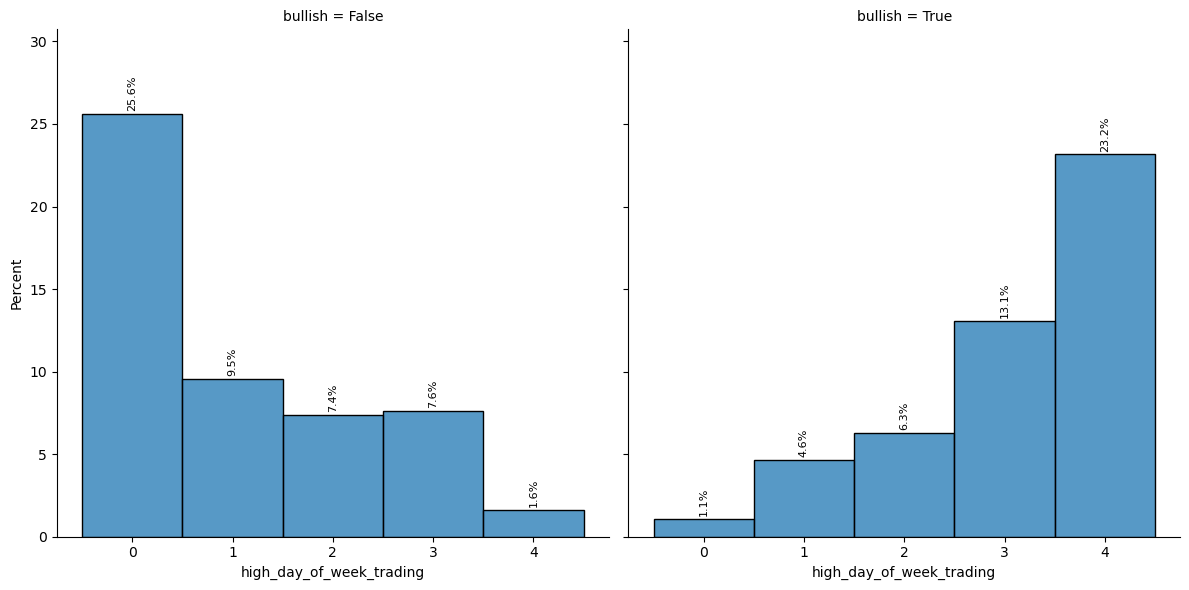

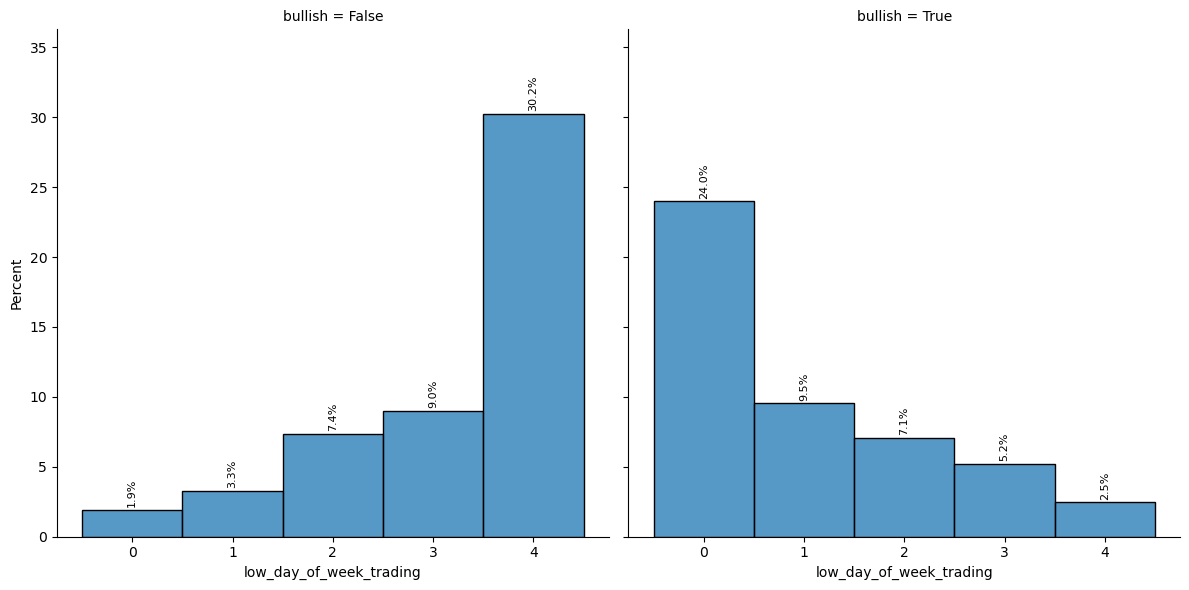

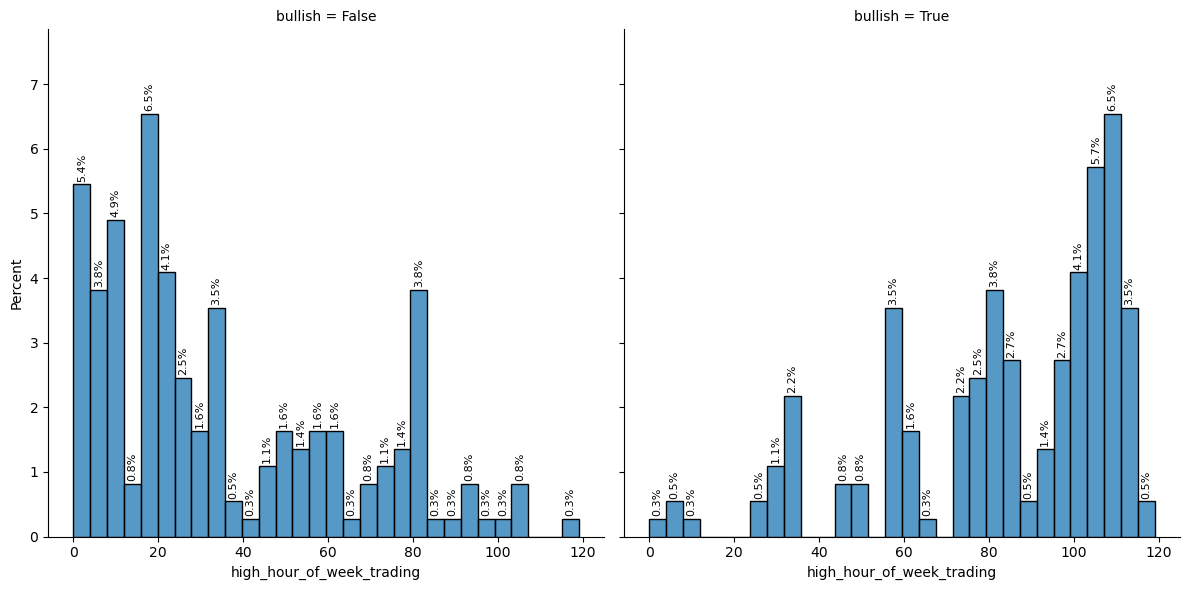

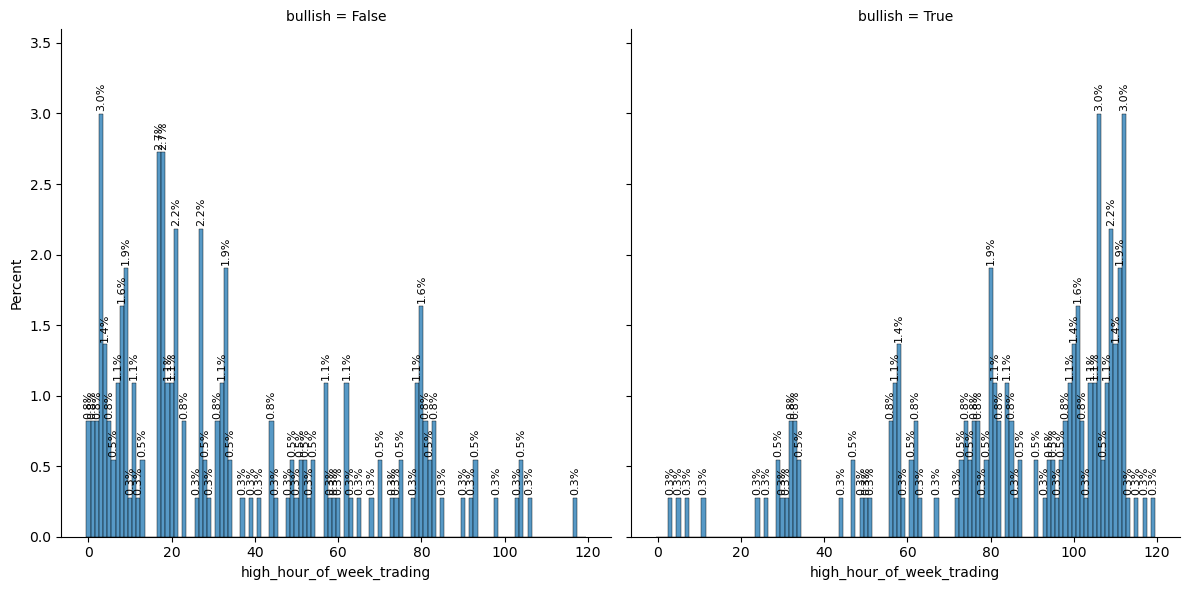

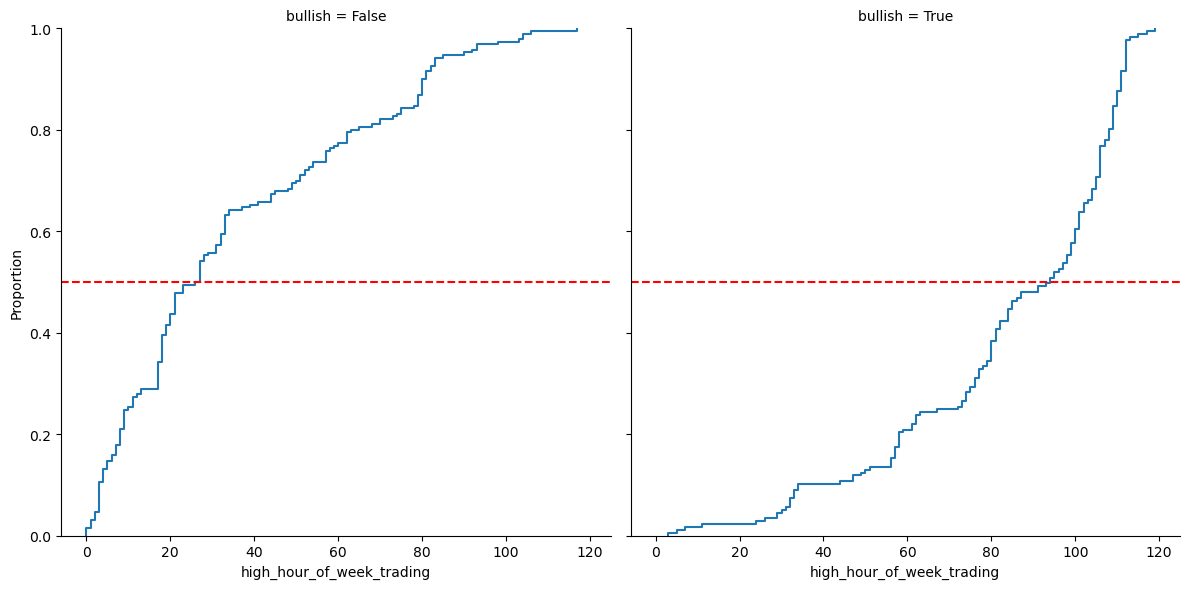

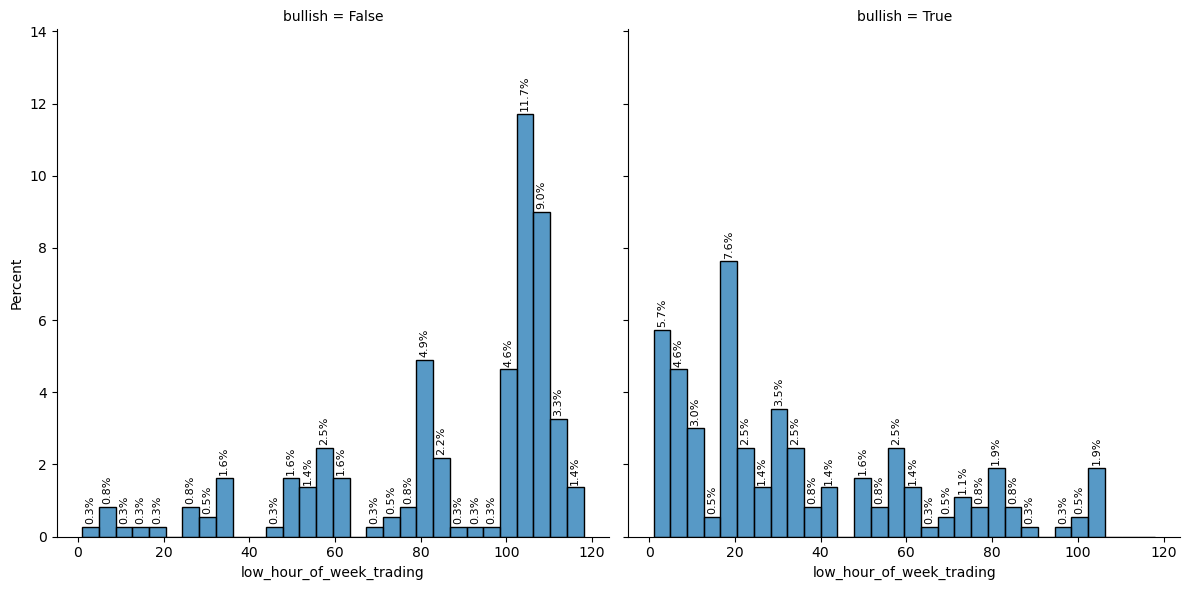

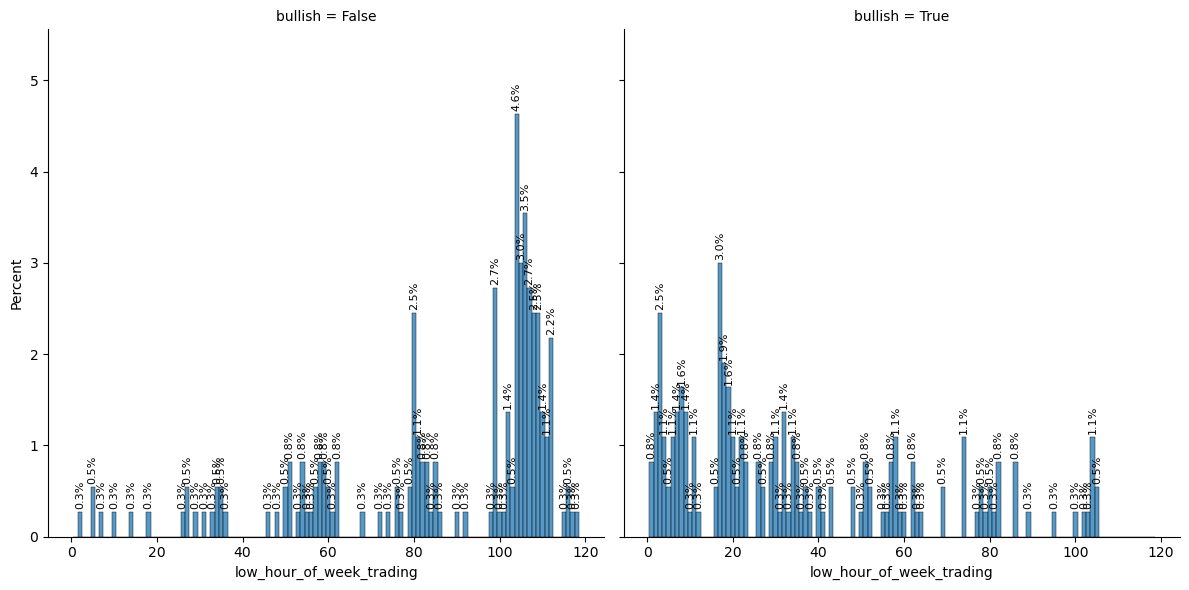

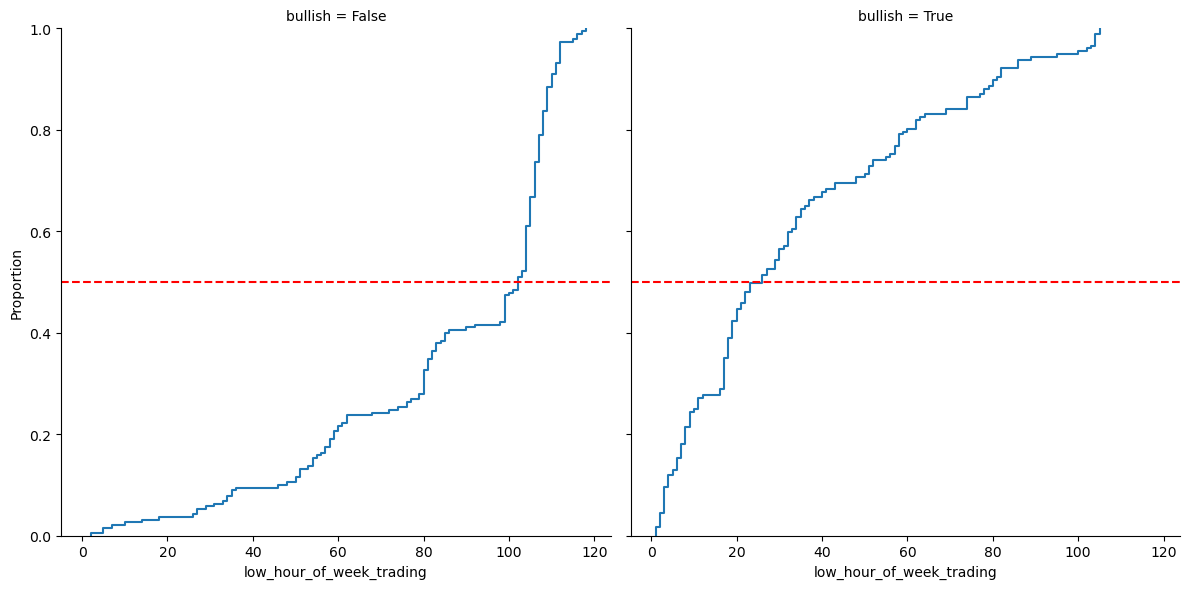

In [167]:


g = sns.displot(kind='hist', x=df_vis.high_day_of_week_trading, col=upbars, height=6, stat='percent', discrete=True)
add_lables(g)

g = sns.displot(kind='hist', x=df_vis.low_day_of_week_trading, col=upbars, height=6, stat='percent', discrete=True)
add_lables(g)

g = sns.displot(kind='hist', x=df_vis.high_hour_of_week_trading, col=upbars, height=6, stat='percent', bins=30)
add_lables(g)

g = sns.displot(kind='hist', x=df_vis.high_hour_of_week_trading, col=upbars, height=6, stat='percent', discrete=True)
add_lables(g)

g = sns.displot(kind='ecdf', x=df_vis.high_hour_of_week_trading, col=upbars, height=6, stat='proportion')
g.map(plt.axhline, y=0.5, ls='--', c='red')

g = sns.displot(kind='hist', x=df_vis.low_hour_of_week_trading, col=upbars, height=6, stat='percent', bins=30)
add_lables(g)

g = sns.displot(kind='hist', x=df_vis.low_hour_of_week_trading, col=upbars, height=6, stat='percent', discrete=True)
add_lables(g)

g = sns.displot(kind='ecdf', x=df_vis.low_hour_of_week_trading, col=upbars, height=6, stat='proportion')
g.map(plt.axhline, y=0.5, ls='--', c='red')

# g = sns.displot(kind='hist', x=df_vis.low_hour_of_week, col=upbars, height=6, stat='percent', discrete=True)
# g = sns.displot(kind='hist', x=df_vis.low_hour_of_week_sun_0, col=upbars, height=6, stat='percent', discrete=True)

# g = sns.displot(kind='hist', x=df_vis.high_day_of_week_sun_0, col=upbars, height=6, stat='percent', discrete=True)
# g = sns.displot(kind='hist', x=df_vis.low_day_of_week_sun_0, col=upbars, height=6, stat='percent', discrete=True)
# g = sns.displot(kind='ecdf', x=df_vis.high_day_of_week_sun_0, col=upbars, height=6, stat='proportion')
# g = sns.displot(kind='ecdf', x=df_vis.low_day_of_week_sun_0, col=upbars, height=6, stat='proportion')

# g = sns.FacetGrid(df_vis, row='high_year',  col=upbars)
# g.map_dataframe(sns.histplot, x="high_day_of_week")

# sns.displot(data=df_vis, x='high_day_of_week')        

### High / Low of the Week by Proportion of Interval:

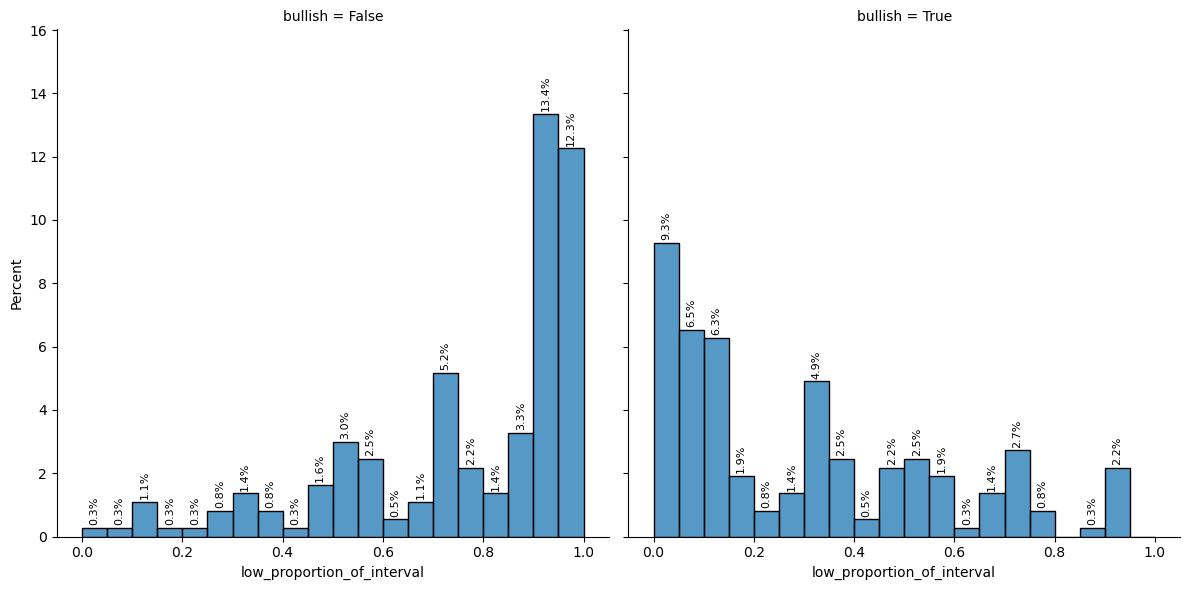

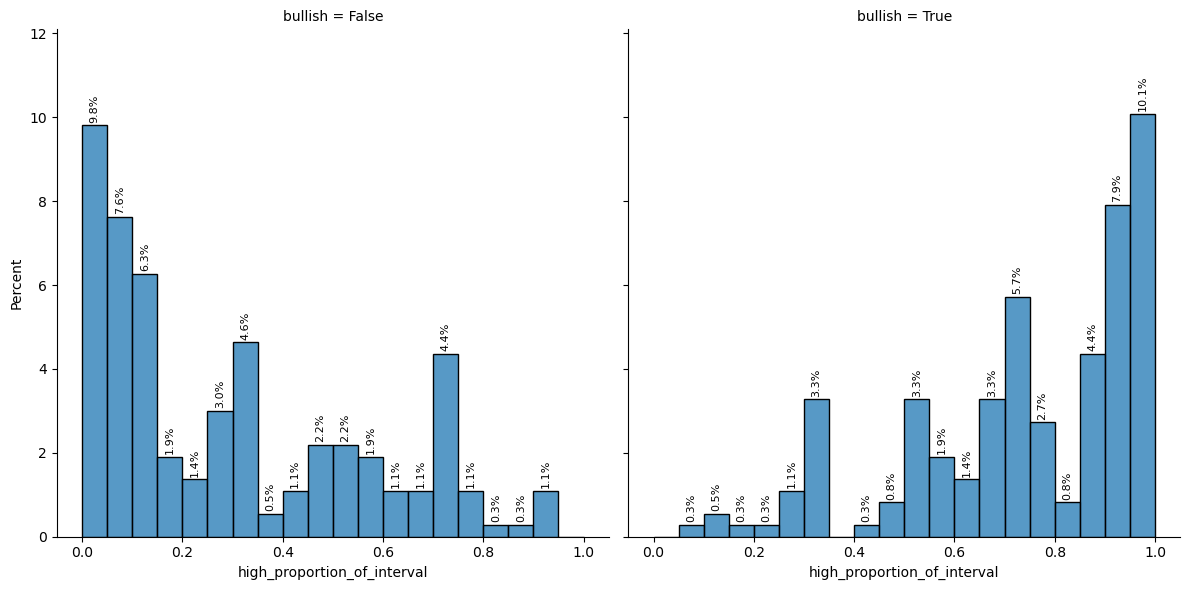

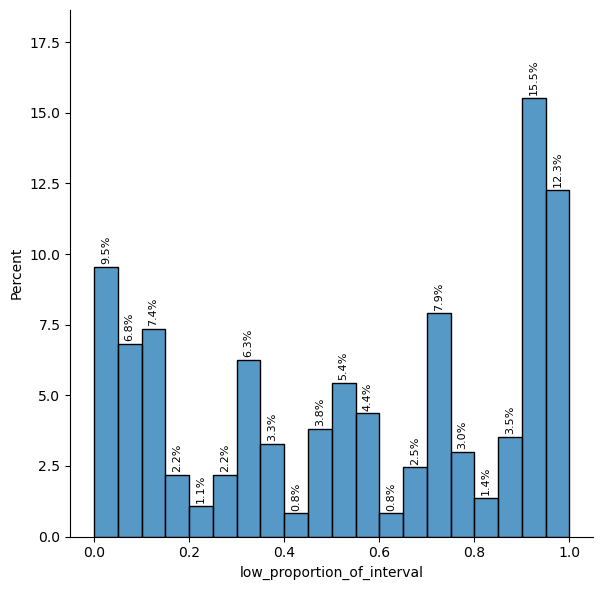

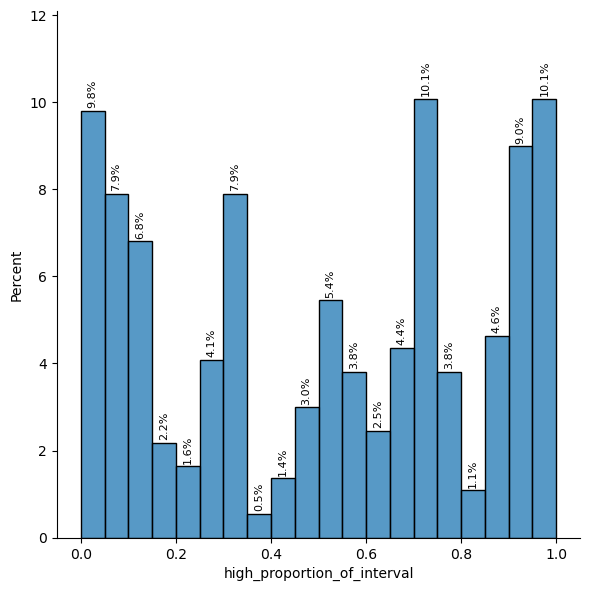

In [168]:
g = sns.displot(kind='hist', x=df_vis.low_proportion_of_interval, col=upbars, height=6, stat='percent', bins=20)
add_lables(g)

g = sns.displot(kind='hist', x=df_vis.high_proportion_of_interval, col=upbars, height=6, stat='percent', bins=20)
add_lables(g)

g = sns.displot(kind='hist', x=df_vis.low_proportion_of_interval, height=6, stat='percent', bins=20)
add_lables(g)

g = sns.displot(kind='hist', x=df_vis.high_proportion_of_interval, height=6, stat='percent', bins=20)
add_lables(g)

In [ ]:

binrange=[-150,150]

def add_lables(g):
    for ax in g.axes.ravel():
        # add annotations
        for c in ax.containers:

            # custom label calculates percent and add an empty string so 0 value bars dont have a number
            labels = ['{:0.1%}'.format(w/100) if (w := v.get_height()) > 0 else '' for v in c]

            ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)

        ax.margins(y=0.2)

        
def filterbars(start_time, end_time, atr_multiple_min=0, atr_multiple_max=9999):
    df_vis = df.between_time(start_time, end_time).dropna()
    df_vis_filtered = df_vis.query('BarRange > ATR_Market * ' + str(atr_multiple_min) + ' and BarRange < ATR_Market * ' + str(atr_multiple_max))
    print(df_vis_filtered[['ATR_Market', 'BarRange']].describe())
    return df_vis_filtered
        
def plotStats():

    df_vis = df
    upbars = df_vis.UpBar
    
    for i in range(1,11):
        g = sns.displot(kind='hist', x=(df_vis[colnames_close[i-1]]-df_vis.Close), col=upbars, height=6, aspect=1.2, binrange=binrange, stat='percent')
        g.set_axis_labels("Cumulative DAX Points", "% of Bars")
        add_lables(g)
        df_vis['Targettimeframe'] = df.Timestamp.shift(-i)
        g.fig.suptitle(str(i) +' - Distribution of Returns from '+ str(df_vis.iloc[0].Timestamp) + ' by ' + str(df_vis.iloc[0].Targettimeframe) + ' ATR min:' + str(atr_multiple_min) + ' ATR max:' + str(atr_multiple_max))
        g.map(plt.axvline, x=0, ls='--', c='red')
      
        g = sns.displot(kind="ecdf", x=(df_vis[colnames_close[i-1]]-df_vis.Close), col=upbars, height=6, aspect=1.2, stat='proportion')
        g.set_axis_labels("Cumulative DAX Points", "% of Bars")
        g.fig.suptitle('Cumulative Dist Func of Returns from '+ str(df_vis.iloc[0].Timestamp) + ' by ' + str(df_vis.iloc[0].Targettimeframe)  + ' ATR min:' + str(atr_multiple_min) + ' ATR max:' + str(atr_multiple_max))
        g.map(plt.axvline, x=0, ls='--', c='red')
        g.map(plt.axhline, y=0.5, ls='--', c='red')
        g.set(xlim=([-50, 50]))
        